In [1]:

# pip install Keras-Preprocessing


In [2]:
# importing libraries

import numpy as np 
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

# Imports and formatting the data
# See previous lab if this is confusing
# Libraries for TensorFlow

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers


# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

# Loading dataset from keras

(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

# Verifying dataset

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


In [3]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest]*3)
xtrain.shape,xtest.shape

((60000, 28, 84), (10000, 28, 84))

In [4]:
# Reshape images as per the tensor format required by tensorflow

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [5]:
# Resize the images 48*48 as required by VGG16

from tensorflow.keras.utils import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [6]:
x=[] # to store array value of the images
x=xtrain
y=[] # to store the labels of the images
y=ytrain

test_images=[]
test_images=xtest
test_images_Original=[]
test_images_Original=xtest
test_image_label=[] # to store the labels of the images
test_image_label=ytest

val_images=[]
val_images=xtest
val_images_Original=[]
val_images_Original=xtest
val_image_label=[] # to store the labels of the images
val_image_label=ytest # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


In [7]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

Training Dataset
(60000, 48, 48, 3)
(60000, 10)


In [8]:
# Train the Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [9]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553467096/553467096 [==============================] - 448s 1us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)     

In [10]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(48,48,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

58889256/58889256 [==============================] - 67s 1us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (Non

In [11]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer
dense1=layers.Dense(100,activation='relu')(flatten)

# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                     

In [12]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                             

In [13]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (No

In [14]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(ytrain, ytest, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [15]:
# Fit the Model

# xtrain2=xtrain.reshape(60000,48,48,3)
# xtest2=xtest.reshape(10000,48,48,3)

history = model.fit(xtrain,ytrain,epochs=5,batch_size=128,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")

Epoch 1/5
375/375 [==============================] - 344s 909ms/step - loss: 2.5110 - accuracy: 0.6877 - val_loss: 0.6710 - val_accuracy: 0.8491
Epoch 2/5
375/375 [==============================] - 336s 897ms/step - loss: 0.5133 - accuracy: 0.8716 - val_loss: 0.4359 - val_accuracy: 0.8900
Epoch 3/5
375/375 [==============================] - 346s 923ms/step - loss: 0.3674 - accuracy: 0.8991 - val_loss: 0.3410 - val_accuracy: 0.9053
Epoch 4/5
375/375 [==============================] - 334s 892ms/step - loss: 0.3069 - accuracy: 0.9118 - val_loss: 0.3064 - val_accuracy: 0.9127
Epoch 5/5
375/375 [==============================] - 338s 902ms/step - loss: 0.2748 - accuracy: 0.9181 - val_loss: 0.3036 - val_accuracy: 0.9121
Fitting the model completed.


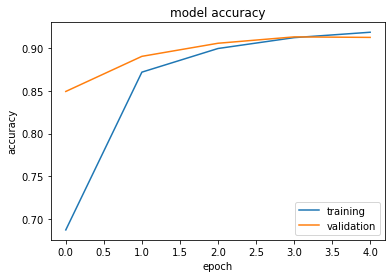

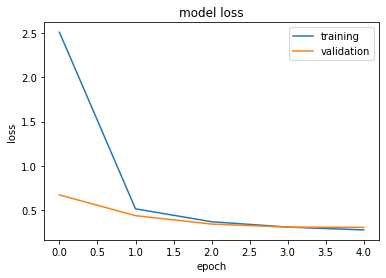

ValueError: Data cardinality is ambiguous:
  x sizes: 48000
  y sizes: 12000
Make sure all arrays contain the same number of samples.

In [16]:
plot_training_history(history, model)

In [17]:
#save model
model.save_weights('vgg16_wieghts.h5')
model.save('vgg16-digitRecognizer_keras.h5')